# 1. Import library

In [219]:
# to handle datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split
# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier 
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# 2. Import data

In [235]:
# load dataset
df = pd.read_csv('Train_Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Types of variables

To find out what types of variables there are in this dataset

## 3.1. Inspect the type of variables 

In [236]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are a mixture of categorical and numerical variables. Numerical are those of type int and float. Categorical those of type object.
+ Numerical vars may include: continous vars, discrete vars, sequence nunber (Id), or wrong format of categorical vars 
+ Categorical vars may include: text vars, datetime vars, or wrong format of numeric vars 

At this step, need to categorize to types of vars and have closer examination for problems they may have and clean data approriately

## 3.2. Categorize type of variables

In [237]:
## target
target = ['Survived']
print("\nTarget var: ", target)

## cat vars
cat_vars = [var for var in df.columns if df[var].dtypes == 'O' if var not in target]
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

num_vars = [var for var in df.columns if df[var].dtypes != 'O' if var not in target]
print("\nNumerical vars: ", num_vars)
print('There are {} numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df[var].unique()) < 30]
print("\nDiscrete vars: ", dis_vars)
print('There are {} numerical variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} numerical variables'.format(len(cont_vars)))


Target var:  ['Survived']

Categorical vars:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
There are 5 categorical variables

Numerical vars:  ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
There are 6 numerical variables

Discrete vars:  ['Pclass', 'SibSp', 'Parch']
There are 3 numerical variables

Continous vars:  ['PassengerId', 'Age', 'Fare']
There are 3 numerical variables


### 3.2.1. Target vars

#### Check if there is row with missing labels or incorrect labels

In [238]:
df[target].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### 3.2.2. Categorical vars

#### View of categorical variables

In [239]:
df[cat_vars].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


**Mixed type of variables**: Cabin and Ticket (value contains both numbers and letters). We could extract the numerical part and then the non-numerical part and generate 2 variables out of them, to see if that adds value to our predictive models.

#### Inspect cardinality: number of labels

In [240]:
for var in cat_vars:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Name  contains  891  labels
Sex  contains  2  labels
Ticket  contains  681  labels
Cabin  contains  148  labels
Embarked  contains  4  labels


+ **High cardinality**: The variables Name, Ticket and Cabin are highly cardinal, i.e., they contain a lot of labels. In addition, those variables are not usable as such, and they require some mannual preprocessing. 

#### Inspect unique values to check abnormal, special letters

In [241]:
removed_list = ['Ticket','Cabin','Name']
selected_list = [e for e in cat_vars if e not in removed_list]

for var in selected_list:
    print(var, ' values: ', df[var].unique())

Sex  values:  ['male' 'female']
Embarked  values:  ['S' 'C' 'Q' nan]


### 3.2.3. Discrete variables

#### View of discrete variables

In [242]:
df[dis_vars].head()

,Pclass,SibSp,Parch
0,3,1,0
1,1,1,0
2,3,0,0
3,1,1,0
4,3,0,0


=> Create new var 'FamilySize' = 'SibSp' + 'Parch'

#### Visualise the values of the discrete variables

In [243]:
for var in ['Pclass',  'SibSp', 'Parch']:
    print(var, ' values: ', df[var].unique())

Pclass  values:  [3 1 2]
SibSp  values:  [1 0 3 4 2 5 8]
Parch  values:  [0 1 2 5 3 4 6]


=> There is no categorical vars with wrong format

### 3.2.3. Continous variables

#### View of continous variables

In [244]:
df[cont_vars].head()

,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500


#### Check PassengerId

In [245]:
print('Number of PassengerId labels: ', len(df.PassengerId.unique()))
print('Number  of passengers on the Titanic: ', len(df))

Number of PassengerId labels:  891
Number  of passengers on the Titanic:  891


=> PassengerId is a unique identifier for each of the passengers. Thus this is not a variable that we can use.

## 3.3. Summary

### Overall
+ Categorical variables: 5
    - 2 Mixed type of variables:  Cabin, Ticket 
    - 3 categorical vars: Sex, Name, Embarked
+ Numerical variables: 6
    - 3 discrete: Pclass, SibSp and Parch
    - 2 continuous: Fare and Age
    - 1 sequence number: Id 
+ Binary target: 1 (Survived)

### Problems
+ Sequence number: PassengerId (it is a label for each of the passengers)  => redundant variable, and should be removed
+ Mixed type of variable: Cabin and Ticket could be treated as mixed type of variables (numbers and strings)=> Mannual preprocessing (extract numerical part and non-numerical part)
+ High cardinality: The variables Name, Ticket and Cabin are highly cardinal, i.e., they contain a lot of labels. In addition, those variables are not usable as such, and they require some mannual preprocessing. 

# 4. Data Cleaning

### 4.2. Remove redundant rows

### 4.1. Remove unneccessary cols

In [246]:
removed_vars = ['PassengerId']
seleveted_vars = [var for var in df.columns if var not in removed_vars]
df = df[seleveted_vars]
print(df.shape)

(891, 11)


### 4.3. Convert wrong format to right format

### 4.4. Re-define group of vars

In [247]:
## target
target = ['Survived']
print("\nTarget var: ", target)

## cat vars
cat_vars = [var for var in df.columns if df[var].dtypes == 'O' if var not in target]
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

num_vars = [var for var in df.columns if df[var].dtypes != 'O' if var not in target]
print("\nNumerical vars: ", num_vars)
print('There are {} numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print("\nDiscrete vars: ", dis_vars)
print('There are {} numerical variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} numerical variables'.format(len(cont_vars)))


Target var:  ['Survived']

Categorical vars:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
There are 5 categorical variables

Numerical vars:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
There are 5 numerical variables

Discrete vars:  ['Pclass', 'SibSp', 'Parch']
There are 3 numerical variables

Continous vars:  ['Age', 'Fare']
There are 2 numerical variables


In [248]:
org_vars = df.columns
org_vars

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 4.5. Reset index

In [249]:
df = df.reset_index(drop = True)
df.shape

(891, 11)

# 5. Feature Engineering

In [250]:
new_vars = []

## 5.2. Pre-processing of mixed type of variables

The variables Cabin and Ticket contain both numbers and letters => create 2 variables for each extracting the numerical and categorical part.

#### Cabin

In [251]:
# Cabin
df['Cabin_numerical'] = df.Cabin.str.extract('(\d+)') # extracts number from string
df['Cabin_numerical'] = df['Cabin_numerical'].astype('float') # parses the above variable to float type

df['Cabin_categorical'] = df['Cabin'].str[0] # captures first letter of string (the letter of the cabin)

df[['Cabin', 'Cabin_numerical', 'Cabin_categorical']].head()

,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,C85,85.0,C
2,NaN,NaN,NaN
3,C123,123.0,C
4,NaN,NaN,NaN


In [252]:
# Explore the ticket categorical part a bit further
df.Cabin_categorical.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [253]:
# drop the original variable
df.drop(labels='Cabin', inplace=True, axis=1)

#### Ticket

In [254]:
# extract the last bit of ticket as number
df['Ticket_numerical'] = df.Ticket.apply(lambda s: s.split()[-1])
df['Ticket_numerical'] = np.where(df.Ticket_numerical.str.isdigit(), df.Ticket_numerical, np.nan)
df['Ticket_numerical'] = df['Ticket_numerical'].astype('float')

# extract the first part of ticket as category
df['Ticket_categorical'] = df.Ticket.apply(lambda s: s.split()[0])
df['Ticket_categorical'] = np.where(df.Ticket_categorical.str.isdigit(), np.nan, df.Ticket_categorical)

df[['Ticket', 'Ticket_numerical', 'Ticket_categorical']].head()

,Ticket,Ticket_numerical,Ticket_categorical
0,A/5 21171,21171.0,A/5
1,PC 17599,17599.0,PC
2,STON/O2. 3101282,3101282.0,STON/O2.
3,113803,113803.0,NaN
4,373450,373450.0,NaN


In [255]:
# let's explore the ticket categorical part a bit further
df.Ticket_categorical.unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [256]:
# it contains several labels, some of them seem very similar apart from the punctuation
# I will try to reduce this number of labels a bit further

# remove non letter characters from string
text = df.Ticket_categorical.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))

# to visualise the output and compare with input
pd.concat([text, df.Ticket_categorical], axis=1)

,Ticket_categorical,Ticket_categorical
0,A,A/5
1,PC,PC
2,STONO,STON/O2.
3,nan,NaN
4,nan,NaN
...,...,...
886,nan,NaN
887,nan,NaN
888,WC,W./C.
889,nan,NaN


In [257]:
# set to upper case: we reduce the number of labels quite a bit
text = text.str.upper()
text.unique()

array(['A', 'PC', 'STONO', 'NAN', 'PP', 'CA', 'SCPARIS', 'SCA', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SOP', 'FA', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC', 'SOTONO',
       'CASOTON'], dtype=object)

In [258]:
# process the variable in submission as well
df['Ticket_categorical'] = text

In [259]:
# drop the original variable
df.drop(labels='Ticket', inplace=True, axis=1)

## 5.3. Tailored preprocessing / Feature Generation

The variable Name contains 891 different values, one for each of the passengers. We wouldn't be able to use this variable as is. However, we can extract some data from it, for example the title. See below.

### 5.3.1. Extract title from Name

In [260]:
def get_title(passenger):
    # extracts the title from the name variable
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
df['Title'] = df['Name'].apply(get_title)
df[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [261]:
# drop the original variable
df.drop(labels='Name', inplace=True, axis=1)

### 5.3.2. Calculate family size

1     0.602694
2     0.180696
3     0.114478
4     0.032548
6     0.024691
5     0.016835
7     0.013468
11    0.007856
8     0.006734
Name: Family_size, dtype: float64


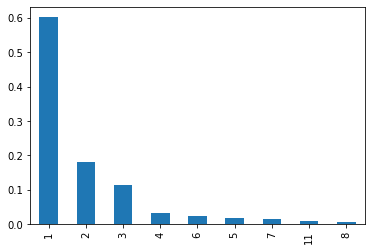

In [262]:
# create a variable indicating family size (including the passenger)
# sums siblings and parents
df['Family_size'] = df['SibSp']+df['Parch']+1

print(df.Family_size.value_counts()/ np.float(len(df)))
(df.Family_size.value_counts() / np.float(len(df))).plot.bar()

The new variable Family size is discrete, because it is the sum of 2 discrete variables. It takes a finite number of values, and large families were rare on the Titanic. In fact, families larger than 7 people were rare, so I will **cap family size at 7**.

### 5.3.3. Variable indicating if passenger was a mother

In [263]:
# variable indicating if passenger was a mother
df['is_mother'] = np.where((df.Sex =='female')&(df.Parch>=1)&(df.Age>18),1,0)
df[['Sex', 'Parch', 'Age', 'is_mother']].head()

,Sex,Parch,Age,is_mother
0,male,0,22.0,0
1,female,0,38.0,0
2,female,0,26.0,0
3,female,0,35.0,0
4,male,0,35.0,0


In [264]:
df.loc[df.is_mother==1, ['Sex', 'Parch', 'Age', 'is_mother']].head()

,Sex,Parch,Age,is_mother
8,female,2,27.0,1
25,female,5,38.0,1
88,female,2,23.0,1
98,female,1,34.0,1
136,female,2,19.0,1


In [265]:
print('there were {} mothers in the Titanic'.format(df.is_mother.sum()))

there were 64 mothers in the Titanic


## 5.1. Feature Transformation

### 5.1.1. Gaussian Transformation

#### Log transaform

## 5.4. Re-define group of vars

In [266]:
## target
target = ['Survived']
print("\nTarget var: ", target)

## cat vars
cat_vars = [var for var in df.columns if df[var].dtypes == 'O' if var not in target]
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

num_vars = [var for var in df.columns if df[var].dtypes != 'O' if var not in target]
print("\nNumerical vars: ", num_vars)
print('There are {} numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print("\nDiscrete vars: ", dis_vars)
print('There are {} numerical variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} numerical variables'.format(len(cont_vars)))


Target var:  ['Survived']

Categorical vars:  ['Sex', 'Embarked', 'Cabin_categorical', 'Ticket_categorical', 'Title']
There are 5 categorical variables

Numerical vars:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_numerical', 'Ticket_numerical', 'Family_size', 'is_mother']
There are 9 numerical variables

Discrete vars:  ['Pclass', 'SibSp', 'Parch', 'Family_size', 'is_mother']
There are 5 numerical variables

Continous vars:  ['Age', 'Fare', 'Cabin_numerical', 'Ticket_numerical']
There are 4 numerical variables


# 7. Data Preprocessing

## 7.1. Separate train and test set

In [267]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(df, df.Survived, test_size=0.25, random_state=0, stratify = df.Survived)
X_train.shape, X_test.shape

((668, 15), (223, 15))

In [268]:
print(y_train.sum()/y_train.count())
print(y_test.sum()/y_test.count())

0.38323353293413176
0.38565022421524664


## 7.2. Engineering missing values

### 7.2.1. Numerical variables

#### Variables with missing data

In [269]:
for col in num_vars:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Age 0.20359281437125748
Cabin_numerical 0.7754491017964071
Ticket_numerical 0.004491017964071856


- Age and ticket contains < 50% NA: create additional variable with NA + random sample imputation
- Cabin_numerical contains > 50% NA: impute NA by value far in the distribution

#### Define function

In [270]:
def impute_na(X_train, df, variable):
    # make temporary df copy
    temp = df.copy()
    
    # extract random from train set to fill the na
    random_sample = X_train[variable].dropna().sample(temp[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = temp[temp[variable].isnull()].index
    temp.loc[temp[variable].isnull(), variable] = random_sample
    return temp[variable]

#### Examine mean of 2 classes before processing filling missing data

In [271]:
for col in ['Age', 'Ticket_numerical']:
    print('===============================================================')
    print(col)
    print('===============================================================')
    print(X_train.groupby(target)[col].describe())

Age
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         315.0  30.580952  14.252130  1.00  21.0  29.0  39.0  74.0
1         217.0  28.658618  14.758553  0.42  19.0  28.0  36.0  80.0
Ticket_numerical
          count           mean            std    min      25%       50%  \
Survived                                                                  
0         410.0  376287.790244  754471.056224    3.0  17265.5  238794.5   
1         255.0  226145.494118  595809.896335  751.0  14312.5   29750.0   

               75%        max  
Survived                       
0         349232.5  3101317.0  
1         237702.0  3101288.0  


In [272]:
# Age and ticket
# add variable indicating missingness
for df in [X_train, X_test]:
    for var in ['Age', 'Ticket_numerical']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
    
# replace by random sampling
for df in [X_train, X_test]:
    for var in ['Age', 'Ticket_numerical']:
        df[var] = impute_na(X_train, df, var)
    
# Cabin numerical
extreme = X_train.Cabin_numerical.mean() + X_train.Cabin_numerical.std()*3
for df in [X_train, X_test]:
    df.Cabin_numerical.fillna(extreme, inplace=True)

#### Post check to evaluate mean

In [273]:
for col in ['Age', 'Ticket_numerical']:
    print('===============================================================')
    print(col)
    print('===============================================================')
    print(X_train.groupby(target)[col].describe())

Age
          count       mean        std   min   25%   50%    75%   max
Survived                                                            
0         412.0  30.846286  14.089622  0.67  21.0  29.0  39.00  74.0
1         256.0  28.606133  14.705995  0.42  19.0  28.0  36.25  80.0
Ticket_numerical
          count           mean            std    min       25%       50%  \
Survived                                                                   
0         412.0  375059.463592  752886.474185    3.0  16679.25  238794.5   
1         256.0  226617.843750  594688.518787  751.0  14312.75   30388.0   

                75%        max  
Survived                        
0         349231.50  3101317.0  
1         238534.25  3101288.0  


### 7.2.2. Categorical variables

#### Variables with missing data

In [274]:
# print variables with missing data
for col in cat_vars:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Embarked 0.0029940119760479044
Cabin_categorical 0.7709580838323353


- Embarked NA imputed by most frequent category, because NA is low
- Cabin_categorical imputed by 'Missing', because NA is high

#### Filling missing data

In [275]:
# add label indicating 'Missing' to Cabin categorical
# or replace by most frequent label in Embarked

for df in [X_train, X_test]:
    df['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
    df['Cabin_categorical'].fillna('Missing', inplace=True)

### 7.2.3. Recheck missing data

In [276]:
# check absence of null values
X_train.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Cabin_numerical        0
Cabin_categorical      0
Ticket_numerical       0
Ticket_categorical     0
Title                  0
Family_size            0
is_mother              0
Age_NA                 0
Ticket_numerical_NA    0
dtype: int64

In [277]:
X_test.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Cabin_numerical        0
Cabin_categorical      0
Ticket_numerical       0
Ticket_categorical     0
Title                  0
Family_size            0
is_mother              0
Age_NA                 0
Ticket_numerical_NA    0
dtype: int64

## 7.3. Handling outliers

As I was analysing the outliers at the beginning of the notebook, I was taking a note on the preprocessing that I thought would be more convenient for each one of them. The notes are summarised here:

- Age: top-coding (73)
- Fare: equal frequency binning
- Sibsp: top-coding (4)
- Parch: top-coding (2)
- Family Size: top-coding (7)
- Ticket_number: equal frequency binning

### 7.3.1. Top-coding method

In [278]:
def top_code(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [X_train, X_test]:
    df['Age'] = top_code(df, 'Age', 73)
    df['SibSp'] = top_code(df, 'SibSp', 4)
    df['Parch'] = top_code(df, 'Parch', 2)
    df['Family_size'] = top_code(df, 'Family_size', 7)

In [279]:
# let's check that it worked
for var in ['Age',  'SibSp', 'Parch', 'Family_size']:
    print(var, ' max value: ', X_train[var].max())

Age  max value:  73.0
SibSp  max value:  4
Parch  max value:  2
Family_size  max value:  7


### 7.3.2. Equal frequency binning

#### Fare

In [280]:
# find quantiles and discretise train set
X_train['Fare'], bins = pd.qcut(x=X_train['Fare'], q=8, retbins=True, precision=3, duplicates='raise')
X_test['Fare'] = pd.cut(x = X_test['Fare'], bins=bins, include_lowest=True)

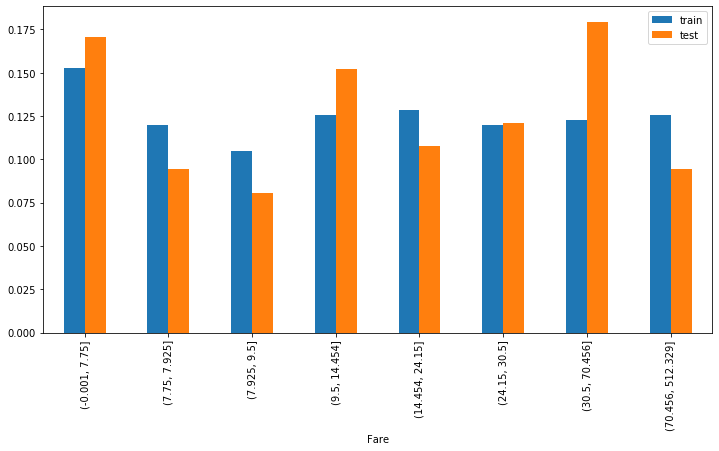

In [281]:
t1 = X_train.groupby(['Fare'])['Fare'].count() / np.float(len(X_train))
t2 = X_test.groupby(['Fare'])['Fare'].count() / np.float(len(X_test))

temp = pd.concat([t1,t2], axis=1)
temp.columns = ['train', 'test']
temp.plot.bar(figsize=(12,6))

In [282]:
# inspect the ticket bins in training set
X_train.Fare.unique()

[(30.5, 70.456], (9.5, 14.454], (24.15, 30.5], (7.75, 7.925], (-0.001, 7.75], (14.454, 24.15], (70.456, 512.329], (7.925, 9.5]]
Categories (8, interval[float64]): [(-0.001, 7.75] < (7.75, 7.925] < (7.925, 9.5] < (9.5, 14.454] < (14.454, 24.15] < (24.15, 30.5] < (30.5, 70.456] < (70.456, 512.329]]

#### Ticket_numerical

In [283]:
# find quantiles and discretise train set
X_train['Ticket_numerical'], bins = pd.qcut(x=X_train['Ticket_numerical'], q=8, retbins=True, precision=3, duplicates='raise')
X_test['Ticket_numerical'] = pd.cut(x = X_test['Ticket_numerical'], bins=bins, include_lowest=True)

In [284]:
X_test.Ticket_numerical.isnull().sum()

0

In [285]:
# inspect the ticket bins in training set
X_train.Ticket_numerical.unique()

[(2743.5, 14883.5], (248720.875, 347082.0], (347082.0, 366336.625], (111739.0, 248720.875], (2.999, 2743.5], (14883.5, 24579.125], (366336.625, 3101317.0], (24579.125, 111739.0]]
Categories (8, interval[float64]): [(2.999, 2743.5] < (2743.5, 14883.5] < (14883.5, 24579.125] < (24579.125, 111739.0] < (111739.0, 248720.875] < (248720.875, 347082.0] < (347082.0, 366336.625] < (366336.625, 3101317.0]]

## 7.4. Engineering rare labels in categorical variables

In [286]:
# find unfrequent labels in categorical variables
for var in cat_vars:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

Sex male      0.648204
female    0.351796
Name: Sex, dtype: float64

Embarked S    0.732036
C    0.185629
Q    0.082335
Name: Embarked, dtype: float64

Cabin_categorical Missing    0.770958
C          0.067365
B          0.064371
D          0.040419
E          0.035928
F          0.008982
A          0.005988
G          0.004491
T          0.001497
Name: Cabin_categorical, dtype: float64

Ticket_categorical NAN        0.736527
PC         0.068862
CA         0.047904
A          0.025449
STONO      0.025449
SOTONOQ    0.019461
SCPARIS    0.013473
WC         0.010479
C          0.005988
SOPP       0.004491
LINE       0.004491
SOC        0.004491
WEP        0.002994
FCC        0.002994
PP         0.002994
SOTONO     0.002994
SWPP       0.002994
PPP        0.002994
CASOTON    0.001497
SCOW       0.001497
SCAH       0.001497
AS         0.001497
FA         0.001497
FC         0.001497
SOP        0.001497
SCA        0.001497
SP         0.001497
SC         0.001497
Name: Ticket_categorical, dtyp

In [287]:
def rare_imputation(variable, which='rare'):    
    # find frequent labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.01].index.values]
    
    # create new variables, with Rare labels imputed
    if which=='frequent':
        # find the most frequent category
        mode_label = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], mode_label)
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], mode_label)
        #submission[variable] = np.where(submission[variable].isin(frequent_cat), submission[variable], mode_label)
    
    else:
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
        #submission[variable] = np.where(submission[variable].isin(frequent_cat), submission[variable], 'Rare')

In [288]:
rare_imputation('Cabin_categorical', 'frequent')
rare_imputation('Ticket_categorical', 'rare')

In [289]:
# let's check that it worked
for var in cat_vars:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

Sex male      0.648204
female    0.351796
Name: Sex, dtype: float64

Embarked S    0.732036
C    0.185629
Q    0.082335
Name: Embarked, dtype: float64

Cabin_categorical Missing    0.791916
C          0.067365
B          0.064371
D          0.040419
E          0.035928
Name: Cabin_categorical, dtype: float64

Ticket_categorical NAN        0.736527
PC         0.068862
Rare       0.052395
CA         0.047904
A          0.025449
STONO      0.025449
SOTONOQ    0.019461
SCPARIS    0.013473
WC         0.010479
Name: Ticket_categorical, dtype: float64

Title Mr        0.574850
Miss      0.199102
Mrs       0.146707
Master    0.049401
Other     0.029940
Name: Title, dtype: float64



# 8. Encode categorical variables

In [290]:
cat_vars

['Sex', 'Embarked', 'Cabin_categorical', 'Ticket_categorical', 'Title']

- Sex: one hot encoding
- Remaining variables: replace by risk probability

### 8.1. One hot encoding

In [291]:
for df in [X_train, X_test]:
    df['Sex']  = pd.get_dummies(df.Sex, drop_first=True)

In [292]:
X_train.Sex.unique()

array([1, 0], dtype=uint8)

In [293]:
X_test.Sex.unique()

array([1, 0], dtype=uint8)

In [294]:
cat_vars = [var for var in cat_vars if var not in ['Sex']]
cat_vars

['Embarked', 'Cabin_categorical', 'Ticket_categorical', 'Title']

### 8.2. Replace by risk probability

In [295]:
def encode_categorical_variables(var, target):
        # make label to risk dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)

# enccode labels in categorical vars
for var in cat_vars:
    encode_categorical_variables(var, 'Survived')

### 8.3. Parse discretised variables to object before encoding

In [296]:
# parse discretised variables to object before encoding
for df in [X_train, X_test]:
    df.Fare = df.Fare.astype('O')
    df.Ticket_numerical = df.Ticket_numerical.astype('O')

In [297]:
# encode labels
for var in ['Fare', 'Ticket_numerical']:
    print(var)
    encode_categorical_variables(var, 'Survived')

Fare
Ticket_numerical


In [298]:
#let's inspect the dataset
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
671,0,1,1,31.0,1,0,0.500000,0.345603,71.000000,0.720930,0.421687,0.342857,0.153646,2,0,0,0
417,1,2,0,18.0,0,2,0.416667,0.345603,157.888732,0.304348,0.279070,0.382114,0.706767,3,0,0,0
634,0,3,0,9.0,3,2,0.450000,0.345603,157.888732,0.304348,0.123457,0.382114,0.706767,6,0,0,0
323,1,2,0,22.0,1,1,0.450000,0.345603,157.888732,0.304348,0.279070,0.382114,0.795918,3,1,0,0
379,0,3,1,19.0,0,0,0.212500,0.345603,157.888732,0.304348,0.279070,0.382114,0.153646,1,0,0,0


In [299]:
X_train.to_csv('preprocessed_Train.csv',index=False)
X_test.to_csv('preprocessed_Test.csv',index=False)

We can see that the labels how now been replaced by the survival probability.

# 9. Feature scaling

In [202]:
X_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.383234,2.299401,0.648204,29.975808,0.473054,0.330838,0.383234,0.383234,134.545454,0.383234,0.383234,0.383234,0.383234,1.835329,0.068862,0.203593,0.004491
std,0.486539,0.841324,0.477889,14.320838,0.901868,0.647779,0.171866,0.071882,46.398332,0.156381,0.145217,0.099212,0.279790,1.416272,0.253410,0.402971,0.066915
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.142857,0.345603,2.000000,0.304348,0.123457,0.058824,0.153646,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,0.225490,0.345603,157.888732,0.304348,0.279070,0.382114,0.153646,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,0.395349,0.345603,157.888732,0.304348,0.357143,0.382114,0.153646,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,0.450000,0.381818,157.888732,0.304348,0.496988,0.382114,0.706767,2.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,73.000000,4.000000,2.000000,0.714286,0.532258,157.888732,0.750000,0.607143,0.630435,0.795918,7.000000,1.000000,1.000000,1.000000


In [203]:
variables_that_need_scaling = ['Pclass', 'Age', 'Sibsp', 'Parch', 'Cabin_numerical', 'Family_size']

In [204]:
training_vars = [var for var in X_train.columns if var not in ['PassengerId', 'Survived']]
training_vars

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_numerical',
 'Cabin_categorical',
 'Ticket_numerical',
 'Ticket_categorical',
 'Title',
 'Family_size',
 'is_mother',
 'Age_NA',
 'Ticket_numerical_NA']

In [205]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set and then transform it

MinMaxScaler(copy=True, feature_range=(0, 1))

The scaler is now ready, we can use it in a machine learning algorithm when required. See below.

# 10. Machine Learning algorithm building

In [69]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(kernel="linear")))
models.append(('LSVC', SVC(kernel="rbf")))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('LGB',LGBMClassifier()))
models.append(('ADA',AdaBoostClassifier()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('NN',MLPClassifier()))
models.append(('XGB',XGBClassifier()))

NameError: name 'LogisticRegression' is not defined

In [671]:
# Test options and evaluation metric
seed = 9
scoring = 'accuracy'

In [672]:
X_train[training_vars].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
671,1,0.184758,31.0,1,0,0.500000,0.345603,71.000000,0.720930,0.421687,0.342857,0.153646,2,0,0,0
417,2,0.748936,18.0,0,2,0.416667,0.345603,157.888732,0.304348,0.279070,0.382114,0.706767,3,0,0,0
634,3,0.748936,9.0,3,2,0.450000,0.345603,157.888732,0.304348,0.123457,0.382114,0.706767,6,0,0,0
323,2,0.748936,22.0,1,1,0.450000,0.345603,157.888732,0.304348,0.279070,0.382114,0.795918,3,1,0,0
379,3,0.184758,19.0,0,0,0.212500,0.345603,157.888732,0.304348,0.279070,0.382114,0.153646,1,0,0,0


In [673]:
X_test[training_vars].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
288,2,0.184758,42.0,0,0,0.416667,0.345603,157.888732,0.304348,0.493976,0.382114,0.153646,1,0,0,0
869,3,0.184758,4.0,1,1,0.416667,0.345603,157.888732,0.304348,0.123457,0.382114,0.575758,3,0,0,0
182,3,0.184758,9.0,4,2,0.500000,0.345603,157.888732,0.304348,0.279070,0.382114,0.575758,7,0,0,0
684,2,0.184758,60.0,1,1,0.500000,0.345603,157.888732,0.304348,0.506024,0.382114,0.153646,3,0,0,0
599,1,0.184758,49.0,1,0,0.500000,0.532258,20.000000,0.304348,0.607143,0.630435,0.153646,2,0,0,0


In [674]:
X_test.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Cabin_numerical        0
Cabin_categorical      0
Ticket_numerical       0
Ticket_categorical     0
Title                  0
Family_size            0
is_mother              0
Age_NA                 0
Ticket_numerical_NA    0
dtype: int64

In [675]:
# evaluate each model in turn
results = {}
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train[training_vars], y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.695997 (0.046076)
SVC: 0.833740 (0.034185)
LSVC: 0.685527 (0.054067)
LR: 0.821777 (0.036073)
DT: 0.787404 (0.042204)
GNB: 0.767910 (0.049864)
RF: 0.841271 (0.035032)
GB: 0.826278 (0.028951)
LGB: 0.812800 (0.044375)
ADA: 0.809769 (0.031491)
QDA: 0.742537 (0.138011)
NN: 0.735075 (0.054510)
XGB: 0.838195 (0.046248)


In [676]:
results_df = pd.DataFrame(results)
results_df

,KNN,SVC,LSVC,LR,DT,GNB,RF,GB,LGB,ADA,QDA,NN,XGB
0,0.731343,0.850746,0.701493,0.850746,0.880597,0.746269,0.940299,0.880597,0.910448,0.865672,0.597015,0.716418,0.940299
1,0.686567,0.865672,0.611940,0.835821,0.776119,0.641791,0.820896,0.820896,0.791045,0.820896,0.776119,0.641791,0.805970
2,0.731343,0.850746,0.761194,0.776119,0.776119,0.791045,0.835821,0.850746,0.791045,0.805970,0.805970,0.805970,0.835821
3,0.597015,0.805970,0.701493,0.805970,0.731343,0.776119,0.850746,0.805970,0.805970,0.776119,0.388060,0.686567,0.820896
4,0.716418,0.805970,0.671642,0.850746,0.761194,0.791045,0.805970,0.791045,0.761194,0.820896,0.850746,0.820896,0.791045
5,0.761194,0.895522,0.761194,0.880597,0.776119,0.791045,0.835821,0.850746,0.835821,0.820896,0.835821,0.746269,0.880597
6,0.686567,0.791045,0.611940,0.776119,0.850746,0.805970,0.835821,0.805970,0.820896,0.805970,0.820896,0.686567,0.850746
7,0.731343,0.865672,0.731343,0.850746,0.761194,0.835821,0.835821,0.850746,0.835821,0.835821,0.850746,0.746269,0.865672
8,0.666667,0.803030,0.621212,0.772727,0.772727,0.742424,0.833333,0.787879,0.742424,0.803030,0.742424,0.787879,0.772727
9,0.651515,0.803030,0.681818,0.818182,0.787879,0.757576,0.818182,0.818182,0.833333,0.742424,0.757576,0.712121,0.818182


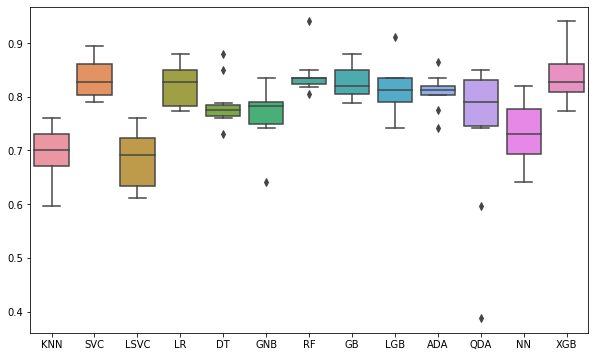

In [677]:
plt.figure(figsize=(10,6))
sns.boxplot(data=results_df)
plt.show()

In [678]:
def ModelEvaluation(models):
    
    for name,model in models:
        print(name)
        model.fit(X_train[training_vars], y_train)
        
        print('==========================================================')
        print('Train set')
        y_train_pred = model.predict(X_train[training_vars])
        print('Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_train, list(y_train_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_train,list(y_train_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'Predicted'
        cm_df.columns.name = 'True'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_train, list(y_train_pred)))
  
        print('----------------------------------------------------------')
        print('Test set')
        y_test_pred = model.predict(X_test[training_vars])
        print('Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
        print('ROC AUC Score: ', roc_auc_score(y_test, list(y_test_pred)))
        cm_df = pd.DataFrame(confusion_matrix(y_test,list(y_test_pred)), index=model.classes_,columns=model.classes_)
        cm_df.index.name = 'Predicted'
        cm_df.columns.name = 'True'
        print('Confusion matrix')
        print(cm_df)
        print(classification_report(y_test, list(y_test_pred)))
        print('==========================================================')
        
ModelEvaluation(models)

KNN
Train set
Accuracy:  0.8143712574850299
ROC AUC Score:  0.7918310072815534
Confusion matrix
True         0    1
Predicted          
0          366   46
1           78  178
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       412
           1       0.79      0.70      0.74       256

    accuracy                           0.81       668
   macro avg       0.81      0.79      0.80       668
weighted avg       0.81      0.81      0.81       668

----------------------------------------------------------
Test set
Accuracy:  0.6995515695067265
ROC AUC Score:  0.6753946698353421
Confusion matrix
True         0   1
Predicted         
0          107  30
1           37  49
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       137
           1       0.62      0.57      0.59        86

    accuracy                           0.70       223
   macro avg       0.68      0.68      0.68       223

Accuracy:  0.9760479041916168
ROC AUC Score:  0.9709685983009709
Confusion matrix
True         0    1
Predicted          
0          409    3
1           13  243
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       412
           1       0.99      0.95      0.97       256

    accuracy                           0.98       668
   macro avg       0.98      0.97      0.97       668
weighted avg       0.98      0.98      0.98       668

----------------------------------------------------------
Test set
Accuracy:  0.8116591928251121
ROC AUC Score:  0.7839500933627567
Confusion matrix
True         0   1
Predicted         
0          124  13
1           29  57
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       137
           1       0.81      0.66      0.73        86

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg 

#### xgboost

In [221]:
xgb_model = XGBClassifier()

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train[training_vars])
y_train_pred = xgb_model.predict(X_train[training_vars])
print('Train Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test[training_vars])
y_test_pred = xgb_model.predict(X_test[training_vars])
print('Test Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train Accuracy:  0.8922155688622755
xgb train roc-auc: 0.9454784208131068
Test Accuracy:  0.8251121076233184
xgb test roc-auc: 0.872559837039552


In [222]:
print(classification_report(y_train, list(y_train_pred)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       412
           1       0.89      0.82      0.85       256

    accuracy                           0.89       668
   macro avg       0.89      0.88      0.88       668
weighted avg       0.89      0.89      0.89       668



In [223]:
print(classification_report(y_test, list(y_test_pred)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       137
           1       0.82      0.70      0.75        86

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



#### Random Forests

In [224]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict_proba(X_train[training_vars])
y_train_pred = rf_model.predict(X_train[training_vars])
print('Train Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = rf_model.predict_proba(X_test[training_vars])
y_test_pred = rf_model.predict(X_test[training_vars])
print('Test Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train Accuracy:  0.9925149700598802
RF train roc-auc: 0.9997060831310679
Test Accuracy:  0.820627802690583
RF test roc-auc: 0.8484128331352911


In [225]:
print(classification_report(y_train, list(y_train_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       412
           1       1.00      0.98      0.99       256

    accuracy                           0.99       668
   macro avg       0.99      0.99      0.99       668
weighted avg       0.99      0.99      0.99       668



In [226]:
print(classification_report(y_test, list(y_test_pred)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       137
           1       0.82      0.69      0.75        86

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



#### Adaboost

In [227]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train[training_vars], y_train)

pred = ada_model.predict_proba(X_train[training_vars])
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test[training_vars])
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Adaboost train roc-auc: 0.916091474514563
Adaboost test roc-auc: 0.828509590901375


#### Logistic regression

In [300]:
logit_model = LogisticRegression()
logit_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = logit_model.predict_proba(scaler.transform(X_train[training_vars]))
print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = logit_model.predict_proba(scaler.transform(X_test[training_vars]))
print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Logit train roc-auc: 0.8864817202669903
Logit test roc-auc: 0.8554150398913597


### Select threshold for maximum accuracy

In [229]:
pred_ls = []
for model in [xgb_model, rf_model, ada_model, logit_model]:
    pred_ls.append(pd.Series(model.predict_proba(X_test[training_vars])[:,1]))

final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc: 0.8628840604311662


In [230]:
tpr, tpr, thresholds = metrics.roc_curve(y_test, final_pred)
thresholds

array([1.62764507, 0.62764507, 0.56797012, 0.56417343, 0.55720727,
       0.55507242, 0.5273123 , 0.52345745, 0.50687492, 0.49509633,
       0.48707828, 0.48655351, 0.44224703, 0.40330573, 0.40217008,
       0.3975981 , 0.3853011 , 0.38225886, 0.37639695, 0.37043703,
       0.3699511 , 0.35846566, 0.34937294, 0.34445146, 0.33609891,
       0.33282961, 0.3214561 , 0.31944167, 0.29679365, 0.27606078,
       0.2708753 , 0.2638218 , 0.26340472, 0.25447466, 0.25334665,
       0.24437294, 0.24168308, 0.22998787, 0.22953174, 0.22169593,
       0.22030031, 0.20472615, 0.20382649, 0.20193098, 0.20142172,
       0.19425281, 0.19382271, 0.18449286, 0.18327862, 0.18076118,
       0.18027007, 0.15708435, 0.15543483, 0.15379603, 0.15359498,
       0.15249702, 0.15213014, 0.15154638, 0.15089811, 0.14994438,
       0.1491663 , 0.14635345, 0.14424247, 0.14097203, 0.14010905,
       0.13696409, 0.13667641, 0.13415568, 0.13392765, 0.13292927,
       0.13142765, 0.12919821, 0.12500112])

In [231]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
12,0.442247,0.838565
17,0.382259,0.829596
16,0.385301,0.825112
15,0.397598,0.825112
18,0.376397,0.825112


# 11. Feature importance

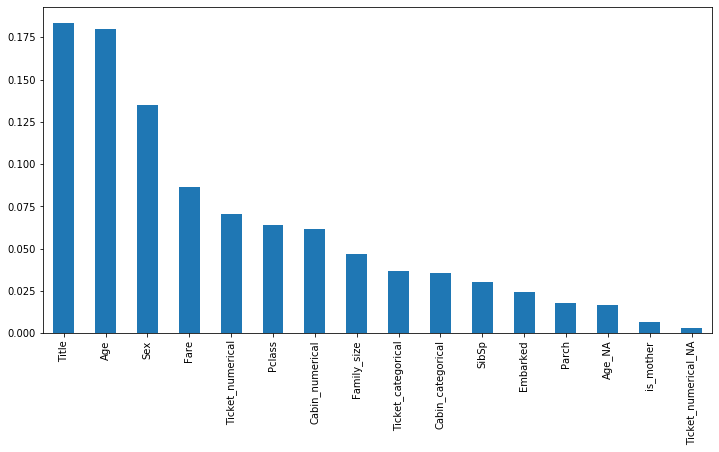

In [232]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

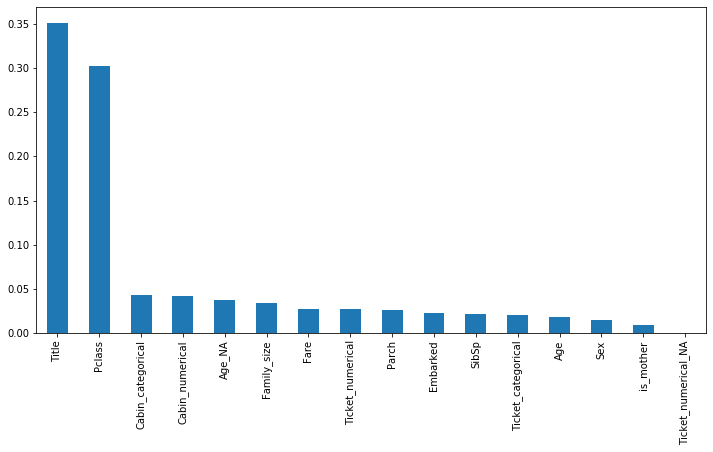

In [233]:
importance = pd.Series(xgb_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

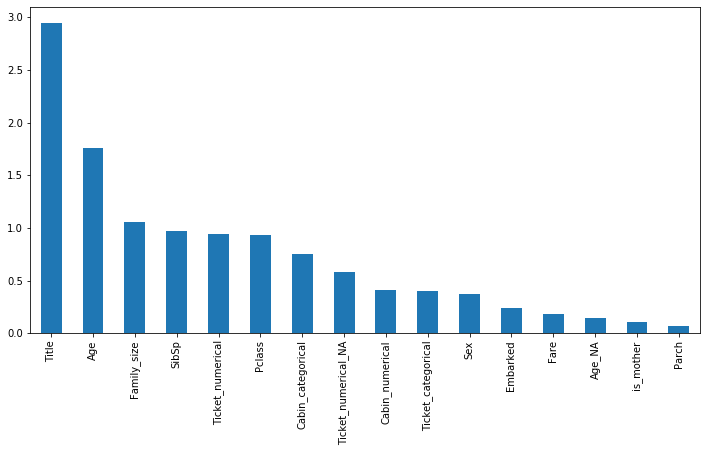

In [234]:
importance = pd.Series(np.abs(logit_model.coef_.ravel()))
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))